![logo](../../../LogoLine_horizon_C3S.png)

# Uncertainty of ice sheet surface elevation change data over Greenland for volume and mass change trend assessments

Production date: 31-05-2025

Dataset version: 5.0

Produced by: Yoni Verhaegen and Philippe Huybrechts (Vrije Universiteit Brussel)

## 🌍 Use case: Monitoring the spatial distribution of Greenland Ice Sheet surface elevation (and mass/volume) change rates over the last several decades to be used in the context of the current climate change

## ❓ Quality assessment question
* **"How adequate are the ice sheet surface elevation change data in terms of their uncertainty and how does it affect estimates of ice sheet volume/mass changes, variability and trends?"**

The C3S surface elevation change (SEC) product quantifies changes in the surface elevation of ice sheets, providing crucial insights into their response to climate change and changing ice sheet dynamics. Satellite remote sensing is a valueable and practical method for regularly monitoring such surface elevation changes over those large, remote ice sheet areas. SEC data on the Climate Data Store (CDS) are derived from satellite radar altimetry, where the time delay between a transmitted pulse from the radar and its surface echo is converted into distance, adjusted for the satellite's known elevation. Repeated measurements of the surface elevation from multiple satellite missions, combined with corrections and interpolation, therefore allows to create a consistent time series of gridded ice sheet surface elevation changes [[1](https://doi.org/10.1016/j.epsl.2018.05.015), [2](https://doi.org/10.5194/tc-13-427-2019)].

While these techniques offer extensive spatial and temporal coverage, they also have limitations, such as inconsistencies due to data aggregation from different satellite sensors and missions, and difficulties with data acquisition over complex terrain. In that regard, this notebook investigates how well the dataset on the CDS (here we use version 5.0) can be used to monitor the spatial distribution of Greenland Ice Sheet (GrIS) surface elevation changes over the last several decades, as well as to derive reliable values for the (inter/intra-annual) variability and temporal trends of the ice sheet surface elevation, volume and mass changes. More specifically, the notebook evaluates whether the dataset is of sufficient maturity and quality for that purpose in terms of its spatio-temporal uncertainty. 

🚨 **Although this notebook deals with the Greenland Ice Sheet only, surface elevation change data for the Antarctic Ice Sheet are also available.**

## 📢 Quality assessment statements

```{admonition} These are the key outcomes of this assessment
:class: note
- Surface elevation change (SEC) detection by radar altimetry is a valuable tool for assessing the impacts of climate change on ice sheets, but has notable (dis)advantages that users should be aware of. The C3S Greenland Ice Sheet (GrIS) surface elevation change (SEC) dataset consists of mature and quality-rich data, covering a time period of over 30 years with a consistent monthly temporal resolution, filled-up data gaps, and meeting minimum international proposed error thresholds for nearly all pixels. This makes it suitable for detecting reliable climate change signals, trends, and variability at local (pixel) to ice sheet-wide scales. Radar altimeters generally provide more robust surface elevation change measurements in the flat, stable regions of the GrIS compared to the coastal areas, which feature complex terrain. Error estimates therefore tend to be slightly higher around the margins. 
- Users should note that SEC cannot be readily converted to volume nor mass changes of the "actual" ice sheet, because converting SEC to volume and mass changes requires adjustments for bedrock uplift, firn densification, and material density differences. Users should also note that biases remain, where radar altimetry tends to underestimate surface lowering rates compared to laser altimetry. This underestimation is aided by the coarse spatial resolution (25 km) of the C3S product, which does not meet minimum thresholds and prevents capturing very localized high mass losses. Despite a favorable error characterization and spatial/temporal coverage, users of the C3S GrIS SEC data product are most likely required to implement additional processing to derive glaciologically interpretable volume/mass changes from the surface elevation changes.
```

## 📋 Methodology

### Dataset description

Surface elevation change detection by satellite radar altimetry is a useful tool to grasp the impact of climate change on the ice sheets. In that regard, the C3S dataset on the Climate Data Store (CDS) provides monthly surface elevation change (SEC) values and their uncertainty for the Greenland (GrIS) and Antarctic Ice Sheet (AIS) on a 25 km spatial resolution grid. The core principle involves measuring surface elevations at different times and comparing them to detect changes. In this dataset, they are derived using satellite radar altimetry that contain data from multiple satellite missions, which are grouped together into a consistent time series for each pixel. Surface elevation changes are reported with units of meter per year and are available since 1992 at monthly-spaced intervals. Data are provided in NetCDF format as gridded data and are available for both the GrIS (excluding peripheral glaciers and ice caps) and AIS (including ice shelves). 

These ice sheet surface elevation change rates are mathematically expressed as:

$\dfrac{dh}{dt} = \dfrac{h_{t_2}-h_{t_1}}{t_{2}-t_{1}}$

where:
- $h$ is the surface elevation (m)
- $t$ the time (yr)

The time for a measurement mentioned in the dataset is the center of a 3-year of 5-year moving window (for the GrIS) and a 5-year moving window (for the AIS) used to derive the SEC values. Users should hereby not that not only ablation or accumulation (i.e. the surface mass balance) can cause the surface elevation to increase or decrease. The surface elevation change rate at a certain pixel contains signals from various processes:

$\dfrac{dh}{dt}_{obs} = \dfrac{SMB}{\rho_m} + \dfrac{BMB}{\rho_i} + \dfrac{D'}{\rho_i} + w_C + w_B$

where the first term on the right-hand side ($SMB$ in units kg m$^{-2}$ yr$^{-1}$) includes elevation changes from surface mass balance processes (i.e. climatically-driven accumulation and melt/runoff), the second one ($BMB$ in units kg m$^{-2}$ yr$^{-1}$) due to basal mass balance processes at the ice-bedrock interface, the third one ($D'$ in units kg m$^{-2}$ yr$^{-1}$) due to ice dynamic processes (e.g. dynamical thinning or thickening), the fourth one ($w_C$) is the vertical velocity due to snow and/or firn compaction (i.e. the transformation and densification of snow towards firn and in a later stage ice), and the last one ($w_B$) due to bedrock elevation  changes (e.g. glacial isostatic adjustment) [[8](https://doi.org/10.5194/tc-5-173-2011), [9](https://doi.org/10.1029/2021JF006505)]. The term $\rho_m$ is the density of the material lost or gained (snow, firn or ice) and $\rho_i$ that of ice. The two latter terms do not contribute to actual mass changes of the ice sheet, while ice dynamics is only relevant with respect to mass changes when ice discharge across the grounding line is considered. For the GrIS as a whole, contributions to mass changes are currently driven by both SMB and ice flow dynamics at an approximately equal magnitude (i.e. 60% SMB and 40% ice dynamics), while for the AIS they are almost entirely driven by ice flow dynamics [[1](https://doi.org/10.1016/j.epsl.2018.05.015), [2](https://doi.org/10.5194/tc-13-427-2019), [10](https://doi.org/10.1038/s41586-019-1855-2), [11](https://doi.org/10.1038/s41586-018-0179-y)]. 

In this notebook, we use version 5.0. For a more detailed description of the data acquisition and processing methods, we refer to the [documentation on the CDS](https://cds.climate.copernicus.eu/datasets/satellite-ice-sheet-elevation-change?tab=overview) and the [ECMWF Confluence Wiki](https://confluence.ecmwf.int/pages/viewpage.action?pageId=355345393) (Copernicus Knowledge Base).

### Structure and (sub)sections

**[](satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-1)**
* [](satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-1-1)
* [](satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-1-2)
* [](satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-1-3)
* [](satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-1-4)

**[](satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-2)**
* [](satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-2-1)
* [](satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-2-2)

**[](satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-3)**
* [](satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-3-1)
* [](satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-3-2)
* [](satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-3-3)

**[](satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-4)**
* [](satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-4-1)
* [](satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-4-2)

**[](satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-5)**

## 📈 Analysis and results

(satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-1)=
### 1. Data preparation and processing

(satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-1-1)=
#### 1.1 Import packages

First we load the packages:

In [31]:
from matplotlib import colors
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import xarray as xr
from datetime import datetime
import pandas as pd
import seaborn as sns
import scipy.stats
from c3s_eqc_automatic_quality_control import download
import os
plt.style.use("seaborn-v0_8-notebook")

(satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-1-2)=
#### 1.2 Define request and download

Then we define requests for download from the CDS and download the ice sheet surface elevation change data.

In [49]:
# Select the domain: "greenland" or "antarctica"
domains = ["greenland"]
collection_id = "satellite-ice-sheet-elevation-change"

# Define the request
request = {
    "variable": "all",
    "format": "zip",
    "climate_data_record_type": "tcdr",
    "version": "5_0",
}

# Download the data
datasets = {}
for domain in domains:
    print(f"{domain=}")
    datasets[domain] = download.download_and_transform(
        collection_id,
        request | {"domain": domain},
    ).compute()

print('Download completed.')

domain='greenland'


100%|██████████| 1/1 [00:00<00:00,  6.93it/s]


Download completed.


(satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-1-3)=
#### 1.3 Display and inspect data

We can read and inspect the data. Let us print out the data to inspect its structure:

In [34]:
datasets

{'greenland': <xarray.Dataset> Size: 76MB
 Dimensions:          (time: 378, y: 123, x: 65)
 Coordinates:
   * time             (time) datetime64[ns] 3kB 1992-01-01 ... 2023-06-01
   * x                (x) float32 260B -7.393e+05 -7.143e+05 ... 8.607e+05
   * y                (y) float32 492B -3.478e+06 -3.453e+06 ... -4.281e+05
 Data variables: (12/15)
     start_time       (time) datetime64[ns] 3kB 1991-08-01 ... 2014-08-01
     end_time         (time) datetime64[ns] 3kB 1996-10-31 ... 2023-07-31
     grid_projection  |S1 1B b''
     lat              (y, x) float32 32kB 58.0 58.04 58.09 ... 81.55 81.35 81.14
     lon              (y, x) float32 32kB -57.0 -56.61 -56.21 ... 17.87 18.55
     dh               (y, x, time) float32 12MB nan nan nan nan ... nan nan nan
     ...               ...
     dhdt_stabil      (y, x, time) float32 12MB nan nan nan nan ... nan nan nan
     dhdt_ok          (y, x, time) int8 3MB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
     dist             (y, x, time) f

The version 5.0 is a gridded dataset at a 25 km spatial resolution containing monthly values of the ice sheet surface elevation change rate $\frac{dh}{dt}$ (`dhdt` in m/yr) and its uncertainty (`dhdt_uncert` in m/yr), as well as the surface elevation change between two measurements $dh$ (`dh` in m, and hence not normalized to "per year") of a grid cell since 1992. The uncertainties are here reported as 1-sigma precision errors or standard deviations. A land mask (`land_mask`), slope mask (`high_slope`), validity flags (`dhdt_ok`) and the surface area of a grid cell (`area`) are also included. The time for a measurement mentioned in the dataset is the center of a 3-year or 5-year moving window used to derive the surface elevation change values. 

Let us check the total temporal extent of the data:

In [35]:
time_bds = datasets['greenland']
time_bounds_values = time_bds['time'].values
begin_period = datetime.strptime(str(time_bounds_values[0]).split('T')[0], "%Y-%m-%d")
end_period = datetime.strptime(str(time_bounds_values[-1]).split('T')[0], "%Y-%m-%d")
time_difference = end_period - begin_period
decimal_years = time_difference.days / 365.25

print(f'The begin period of the dataset is {begin_period.date()} and the end period is {end_period.date()}, which is a total of time {decimal_years:.2f} years.')

The begin period of the dataset is 1992-01-01 and the end period is 2023-06-01, which is a total of time 31.41 years.


(satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-1-4)=
#### 1.4 Data handling and creating functions

Let us now perform some data handling and define a plotting function before getting started with the analysis:

In [36]:
def get_maps(ds, domains):
    (sec_name,) = set(ds.data_vars) & {"sec", "dhdt"}
    da = ds[sec_name]
    da.attrs["long_name"] = "Surface elevation change rate"

    if 'greenland' in domains:
        da_dh = ds["dh"]
        da_dh.attrs["long_name"] = "Surface elevation change"
        da_dh_ok = ds["dhdt_ok"]
        da_dh_ok.attrs["long_name"] = "Validity of surface elevation change"
        da_dist = ds["dist"]
        da_dist.attrs["long_name"] = "Distance to measurement"

    da_err = ds[f"{sec_name}_uncert"]
    da_err.attrs["long_name"] = "Surface elevation change precision error"

    (mask_name,) = set(ds.data_vars) & {"land_mask", "surface_type"}
    mask = ds[mask_name] > 0
    missing = 100 * (da.sizes["time"] - da.notnull().sum("time")) / da.sizes["time"]
    missing.attrs = {"long_name": "Missing data", "units": "%"}

    year_to_ns = 1.0e9 * 60 * 60 * 24 * 365
    coeffs = []
    da_cumsum = da.cumsum("time") / 12
    for degree, name in enumerate(("linear_trend", "acceleration"), start=1):
        coeff = da_cumsum.polyfit("time", degree)["polyfit_coefficients"].sel(
            degree=degree, drop=True
        )
        coeff = degree * coeff * (year_to_ns**degree)
        coeff.attrs = {
            "units": f"{da.attrs['units'].split('/', 1)[0]} yr$^{{-{degree}}}$",
            "long_name": f"{da.attrs['long_name']} {name}".replace("_", " "),
        }
        coeffs.append(coeff.rename(name))

    data_vars = [
        da.rename("sec"),
        da_err.rename("sec_err"),
        mask.rename("mask"),
        missing.rename("missing"),
        ds["high_slope"],
    ]

    if 'greenland' in domains:
        data_vars.append(da_dh.rename("dh"))
        data_vars.append(da_dh_ok.rename("dhdt_ok"))
        data_vars.append(da_dist.rename("dhdt_distance"))

    ds = xr.merge(data_vars + coeffs)
    
    return ds.mean("time", keep_attrs=True)

# Select the specific dataset you want to process, e.g., "greenland"
datasets_original = datasets
selected_ds = datasets["greenland"]
datasets = get_maps(selected_ds, domains)
datasets_get_maps = datasets

# Define plotting function
def plot_maps_single(da, suptitle=None, **kwargs):
    kwargs.setdefault("cmap", "RdBu")
    # Create subplots with Polar Stereographic projection
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.Stereographic(central_longitude=-45, central_latitude=90, true_scale_latitude=70)})
    
    # Plot the data 
    subset_da = da
    im = subset_da.plot.imshow(ax=ax, add_colorbar=False, **kwargs)
    
    # Set extent and plot features
    ax.set_extent([da.coords['x'].values.min(), da.coords['x'].values.max(), da.coords['y'].values.min(), da.coords['y'].values.max()], ccrs.Stereographic(central_longitude=-45, central_latitude=90, true_scale_latitude=70))
    ax.add_feature(cfeature.LAND, edgecolor='black', color='white')
    ax.add_feature(cfeature.OCEAN, color='lightblue')
    ax.coastlines()
    if suptitle:
        ax.set_title(suptitle)
    ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    
    # Add colorbar
    cb = fig.colorbar(im, ax=ax, extend='both', shrink=0.49, label=f"{da.attrs['long_name']} [{da.attrs['units']}]")

    plt.tight_layout()
    plt.show()

# Define the function for plotting a time series
def get_timeseries(ds):
    ds["time"].attrs["long_name"] = "Time"

    (sec_name,) = set(ds.data_vars) & {"sec", "dhdt"}
    da = ds[sec_name]
    da.attrs["long_name"] = "Surface elevation change rate"

    if 'greenland' in domains:
        da_dh = ds["dh"]
        da_dh.attrs["long_name"] = "Surface elevation change"
        da_dh.attrs["units"] = "m"
        da_vol = (da*ds["area"])/1e9
        da_vol.attrs["long_name"] = "Volume change rate"
        da_vol.attrs["units"] = "km³"

    da_err = ds[f"{sec_name}_uncert"]
    da_err.attrs["long_name"] = "Surface elevation change rate error"

    (mask_name,) = set(ds.data_vars) & {"land_mask", "surface_type"}
    mask = ds[mask_name] > 0
    missing = 100 * (mask.sum() - da.notnull().sum(("x", "y"))) / mask.sum()
    missing.attrs = {"long_name": "Missing data", "units": "%"}

    data_vars = [
        da.rename("sec"),
        da_err.rename("sec_err"),
        missing.rename("missing"),
    ]

    if 'greenland' in domains:
        data_vars.append(da_dh.rename("dh"))
        data_vars.append(da_vol.rename("dvol"))

    ds = xr.merge(data_vars)

    # Apply mean to all variables except 'dvol', which will use sum
    mean_ds = ds.drop_vars('dvol').mean(("x", "y"), keep_attrs=True)
    sum_dvol = ds['dvol'].sum(("x", "y"), keep_attrs=True)
    
    # Combine the results
    ds = xr.merge([mean_ds, sum_dvol])

    return ds

selected_ds = datasets_original["greenland"]
datasets_timeseries = get_timeseries(selected_ds)
datasets_timeseries["time"].attrs["units"] = "yr"

Now, our dataset array only holds the most important information, such as the multiyear mean surface elevation change rates (`sec`) and the arithmetic mean precision error (`sec_err`). With the function above, we also calculated linear and quadratic trends of surface elevation changes, as well as the amount of missing values. 

With everything ready, let us now begin with the analysis:

(satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-2)=
### 2. Greenland Ice Sheet surface elevation and altimetric volume changes in space and time

(satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-2-1)=
#### 2.1 Multiyear mean surface elevation changes

We begin by plotting the Greenland multiyear mean surface elevation change $\overline {\frac{dh}{dt}}$ between the beginning and end period with the defined plotting function:

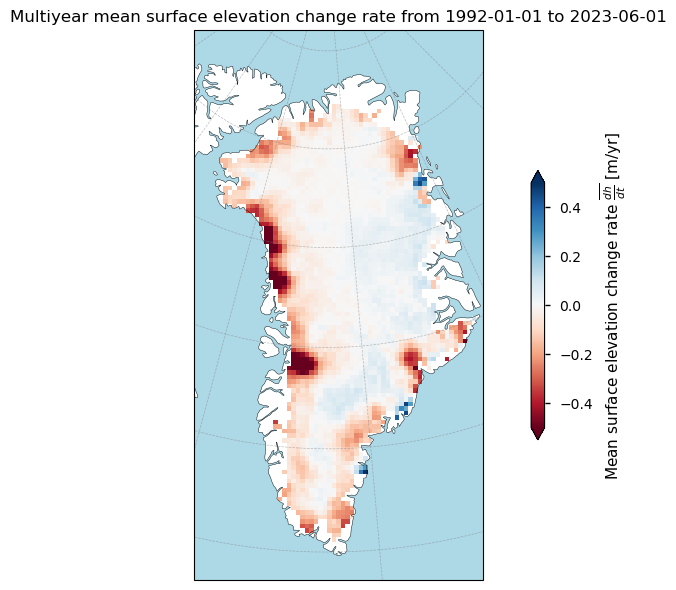

In [37]:
# Apply the function to the surface elevation change rate data
da = datasets["sec"]
da.attrs = {
    "long_name": r"Mean surface elevation change rate $\overline {\frac{dh}{dt}}$",
    "units": "m/yr",
}

# Define dataset to be plotted
suptitle_text = rf"Multiyear mean surface elevation change rate from {begin_period.date()} to {end_period.date()}"
_ = plot_maps_single(
    da,
    vmin=-0.5,
    vmax=0.5,
    suptitle=suptitle_text,
)

*Figure 1. Multiyear mean surface elevation change (SEC) over Greenland from the SEC dataset on the Climate Data Store.*

Overall, the map provides a visual representation of the changes of the surface elevation of Greenland's ice sheet over the last several decades. The red regions, particularly around the margins, indicate areas of significant surface lowering, which is consistent with observations of accelerated glacier flow and ice thinning in these regions [[1](https://doi.org/10.1016/j.epsl.2018.05.015), [3](https://doi.org/10.1016/j.rse.2016.12.012)]. 

Let us quantify the ice sheet-wide average value:

In [38]:
print(f'The Greenland ice sheet-wide average surface elevation change rate value between {begin_period.date()} and {end_period.date()} is {(np.nanmean(da.values)):.5f} m/yr.')

The Greenland ice sheet-wide average surface elevation change rate value between 1992-01-01 and 2023-06-01 is -0.04856 m/yr.


The negative value indicates that the surface of the ice sheet, in general, has been lowering during the last several decades, resulting in net negative values. This is consistent with overall trends in the literature [[1](https://doi.org/10.1016/j.epsl.2018.05.015), [5](https://doi.org/10.1029/2020GL091216), [8](https://doi.org/10.5194/tc-5-173-2011), [10](https://doi.org/10.1038/s41586-019-1855-2)].

(satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-2-2)=
#### 2.2 Conversion into altimetric and "actual" volume changes

We can also convert the surface elevation change values to cumulative altimetric volume changes $V_a$ (with subscript 'a' meaning altimetric) by combining the variables `dh` and `area`. We therefore have to make the assumption that surface elevation changes due to bedrock uplift and firn compaction rates are unsignificant or unknown:

$dV_{a,i} 
$
[m$^{3}$]
$ = \sum\limits^{x,y}{dV_{x,y,i}} = \sum\limits^{x,y}(d{h_{x,y,i}}*A_{x,y})$ 

where $d{h_{x,y}}$ is the height change between two measurement intervals $i$ (from `dh`, in m) and $A_{x,y}$ the surface area (from `area`, in m$^2$) of pixel $x,y$ .

We then take the cumulative value over time to get the cumulative altimetric volume change:

$
{V_a} 
$
[km$^{3}$]
$
= \sum\limits_{i={1}}^{{{n}}} \left(\dfrac{dV_{a,i}}{1 \cdot 10^9}\right)
$

with $dV_{a,i}$ the ice sheet-wide altimetric volume change (in m$^{3}$) between two measurements (as calculated above) and $n$ the number of temporal intervals in the time series.

Let us plot this as a time series:

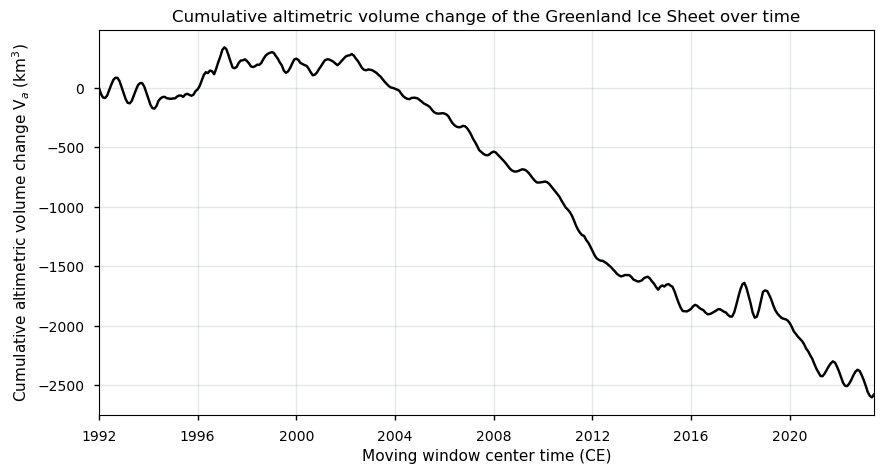

In [39]:
# Given datasets_original is the dataset dictionary
greenland_dataset = datasets_original['greenland']

# Extract the 'dh' and 'area' variables
dh_variable = greenland_dataset['dh']
area_variable = greenland_dataset['area']

# Sum over the x and y dimensions and convert to km^3
dh_summed_time_series = (area_variable*dh_variable).sum(dim=['x', 'y'])/(1e9)
dh_summed_time_series.attrs = {
    "long_name": r"Cumulative volume change",
    "units": "km³",
}

# Plot the resulting time series
fig, ax = plt.subplots(figsize=(10, 5))
dh_summed_time_series.plot(color='black')
plt.title('Cumulative altimetric volume change of the Greenland Ice Sheet over time')
ax.set_xlim(np.min(datasets_timeseries["time"]),np.max(datasets_timeseries["time"]))
ax.set_xlabel("Moving window center time (CE)")
plt.ylabel('Cumulative altimetric volume change V$_a$ (km$^3$)')
plt.grid(color='#95a5a6',linestyle='-',alpha=0.25)
plt.show()

*Figure 2. Cumulative altimetric volume change of the Greenland ice sheet from the SEC dataset on the Climate Data Store.*

As expected, the plot shows a downward pattern of the altimetric volume with a clear trend towards volume losses over time, especially during the more recent years. However, the curve should be interpreted with care. Greenland’s bedrock is namely uplifting currently, due to slow mantle-deformation processes and elastic processes associated with the ongoing ice loss today. Especially around the margins, where ice loss is currently highest, bedrock uplift rates are in the order of several mm per year [[9](https://doi.org/10.1029/2021JF006505)]. Effects from near-surface firn density changes are even larger (i.e. up to a few cm per year) but also uncertain [[4](https://doi.org/10.3189/172756505781829007), [9](https://doi.org/10.1029/2021JF006505)]. In order to obtain "actual" ice sheet volume changes, corrections for firn densification (which can lower the surface without actual mass loss) and bedrock uplift (which does not impact ice thickness changes) are required [[4](https://doi.org/10.3189/172756505781829007), [5](https://doi.org/10.1029/2020GL091216), [8](https://doi.org/10.5194/tc-5-173-2011), [9](https://doi.org/10.1029/2021JF006505)]. As such, to derive pixel-by-pixel ice thickness changes $dH/dt$ from surface elevation changes $dh/dt$ over grounded ice, a correction is needed:

$\dfrac{dH}{dt} 
$
[m yr$^{-1}$]
$= \dfrac{dh}{dt} - w_C - w_B$

which can then be translated into actual volume changes $dV/dt$ by using the surface area $A$ of a grid cell:

$\dfrac{dV}{dt} 
$
[m$^3$ yr$^{-1}$]
$
= A\dfrac{dH}{dt}$

Then, mass changes can be obtained by:

$\dfrac{dM}{dt} 
$
[kg yr$^{-1}$]
$
= \rho_m \dfrac{dV}{dt}$

where the value of the density $\rho_m$ depends on the material/physical process involved in the mass change.

Moreover, for more significant surface lowering rates (lower than ca. -0.5 to -1 m/yr), there seems to be a bias towards an underestimation of lowering rates by the radar altimetry (as used in the C3S products) when compared to the laser altimeters (see for example the [PQAR](https://confluence.ecmwf.int/pages/viewpage.action?pageId=414590531)). This is presumably related to a variety of factors, including different modes of data acquisition (e.g. varying footprint sizes between radar and laser instruments, a varying penetration depth of the radar pulse into snow), different algorithm applications and settings, or post-processing procedures [[3](https://doi.org/10.1016/j.rse.2016.12.012)]. Additionally, in regions with high surface lowering rates, the coarse resolution of the C3S product (25 km) also tends to aid the underestimation of SEC due to the very localized high mass/volume losses of certain outlet glaciers [[5](https://doi.org/10.1029/2020GL091216)].

In that sense, the dataset on the Climate Data Store (CDS) seems to exhibit a net underestimation of the Greenland surface elevation and volume change rates. All the above processes thus tend to bias the volume change estimates of the "actual" ice sheet, making the curve above less suitable for the determination of actual volume or mass changes of the ice sheet. Users of the C3S GrIS SEC data product are therefore most likely required to implement additional processing to derive glaciologically interpretable mass/volume changes from the provided surface elevation changes.

(satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-3)=
### 3. Greenland Ice Sheet surface elevation change error estimates

(satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-3-1)=
#### 3.1 Uncertainty estimates: accuracy and precision

Let us now consider the errors of the data. The total error of a surface elevation change estimate is theoretically given by the sum of the precision (random) and the accuracy (systematic) error:

$
\varepsilon = a\sigma + \delta
$

where $a$ is the critical z-score related to a certain statistical confidence interval, $\sigma$ is the random error (i.e. standard deviation) and $\delta$ the systematic error. 

In the C3S surface elevation change dataset for Greenland, precision errors are reported as the standard deviation (i.e. the 68% confidence interval with $a$ = 1) and the accuracy error is not directly considered in the error estimates provided with the data. Therefore, in our case, $\delta$ = 0, meaning that $\varepsilon_{\frac{dh}{dt}}$ = $\sigma_{\frac{dh}{dt}}$. 

Let us now explore a bit more the uncertainty of the data. Quantitative pixel-by-pixel error estimates are namely available for the dataset. Let us begin by plotting a histogram of the error values:

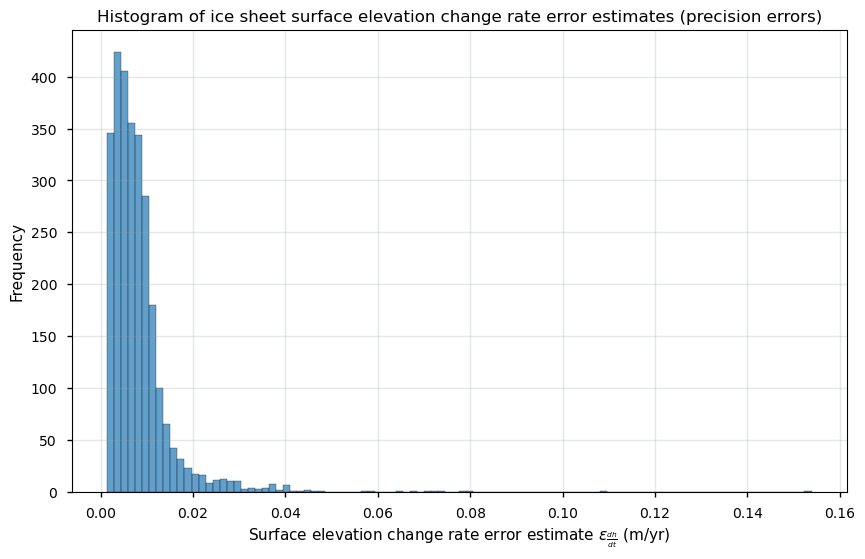

In [40]:
plt.figure(figsize=(10, 6))
error_data = (datasets['sec_err'].values.flatten())
plt.hist(error_data, bins=100, edgecolor='black', alpha=0.7)
plt.title('Histogram of ice sheet surface elevation change rate error estimates (precision errors)')
plt.xlabel(r'Surface elevation change rate error estimate $\varepsilon_{\frac{dh}{dt}}$ (m/yr)')
plt.ylabel('Frequency')
plt.grid(color='#95a5a6',linestyle='-',alpha=0.25)
plt.show()

*Figure 3. Histogram of surface elevation change error estimates for the Greenland ice sheet from the SEC dataset on the Climate Data Store.*

Most errors (standard deviations) seem to be situated between 0 and 0.01 m/yr. Given that the GCOS (2022) requires a precision error threshold (expressed as 2$\sigma$) of at least 0.1 m/yr, it can be stated that this requirement is clearly met for the Greenland Ice Sheet [[6](https://library.wmo.int/idurl/4/58111)]. Let us check the spatial and temporal distribution of these errors below.

(satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-3-2)=
#### 3.2 Surface elevation change errors in space and time

To get a better idea, we can also plot the arithmetic mean values over time for each pixel to check their spatial distribution:

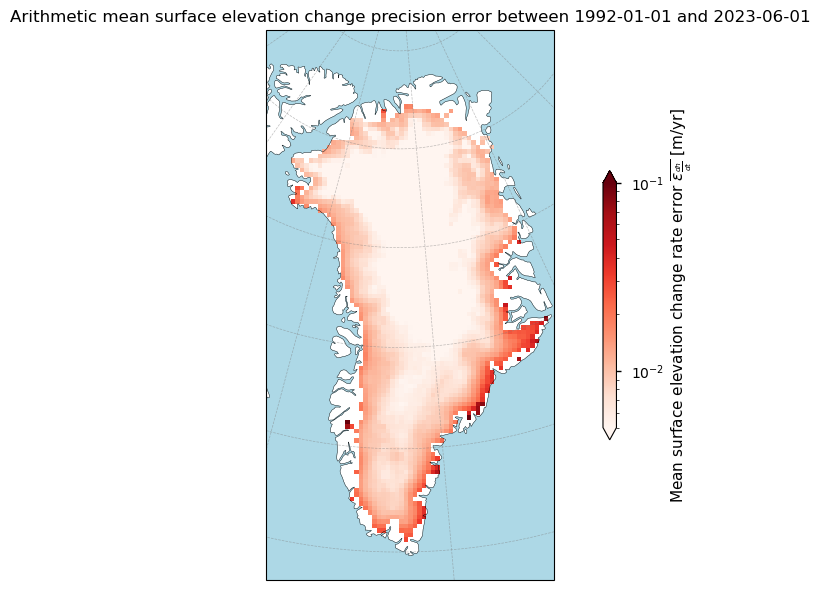

In [41]:
# Apply the function to the surface elevation change rate error data
da = datasets["sec_err"]
da.attrs = {
    "long_name": r"Mean surface elevation change rate error $\overline {\epsilon_{\frac{dh}{dt}}}$",
    "units": "m/yr",
}

# Plot the data
suptitle_text = rf"Arithmetic mean surface elevation change precision error between {begin_period.date()} and {end_period.date()}"
_ = plot_maps_single(
    da,
    cmap="Reds",
    vmin=0.005,
    vmax=0.1,
    norm=colors.LogNorm(),
    suptitle=suptitle_text,
)

*Figure 4. Spatial distribution of temporarily averaged surface elevation change errors for the Greenland ice sheet from the SEC dataset on the Climate Data Store.*

Let us quantify the ice sheet-wide average value:

In [42]:
print(f'The Greenland ice sheet-wide average surface elevation change rate error (standard deviation) between {begin_period.date()} and {end_period.date()} is {(np.nanmean(da.values)):.3f} m/yr.')

The Greenland ice sheet-wide average surface elevation change rate error (standard deviation) between 1992-01-01 and 2023-06-01 is 0.008 m/yr.


We can accordingly plot the data as a time series:

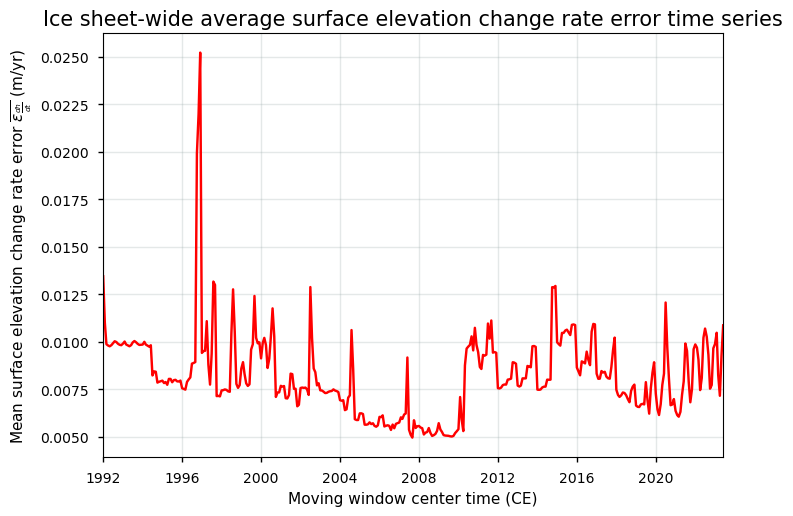

In [43]:
fig, ax = plt.subplots()
ax.plot(datasets_timeseries["time"],datasets_timeseries["sec_err"],'r')
ax.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax.set_xlim(np.min(datasets_timeseries["time"]),np.max(datasets_timeseries["time"]))
ax.set_xlabel("Moving window center time (CE)")
ax.set_ylabel(r"Mean surface elevation change rate error $\overline {\epsilon_{\frac{dh}{dt}}}$ (m/yr)")
ax.set_title("Ice sheet-wide average surface elevation change rate error time series",fontsize=15);
plt.show()

*Figure 5. Time series of the spatially averaged surface elevation change error for the Greenland ice sheet from the SEC dataset on the Climate Data Store.*

The highest errors are clearly present around the marginal errors of the ice sheet. Moreover, no clear trend in the average error values is present in the time series. However, given that the GCOS (2022) requires a precision error threshold (expressed as 2$\sigma$) of at least 0.1 m/yr, it can be stated that this requirement is clearly met for the Greenland Ice Sheet [[6](https://library.wmo.int/idurl/4/58111)]. 

(satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-3-3)=
#### 3.3 Link with surface characteristics

Let us further investigate this pattern and check whether we can link the amount of missing data to the surface characteristics provided with the data. Therefore, we check how the amount of missing data is linked to the surface slope (i.e. as a proxy for the terrain complexity) and the magnitude of the surface elevation changes at a certain pixel:

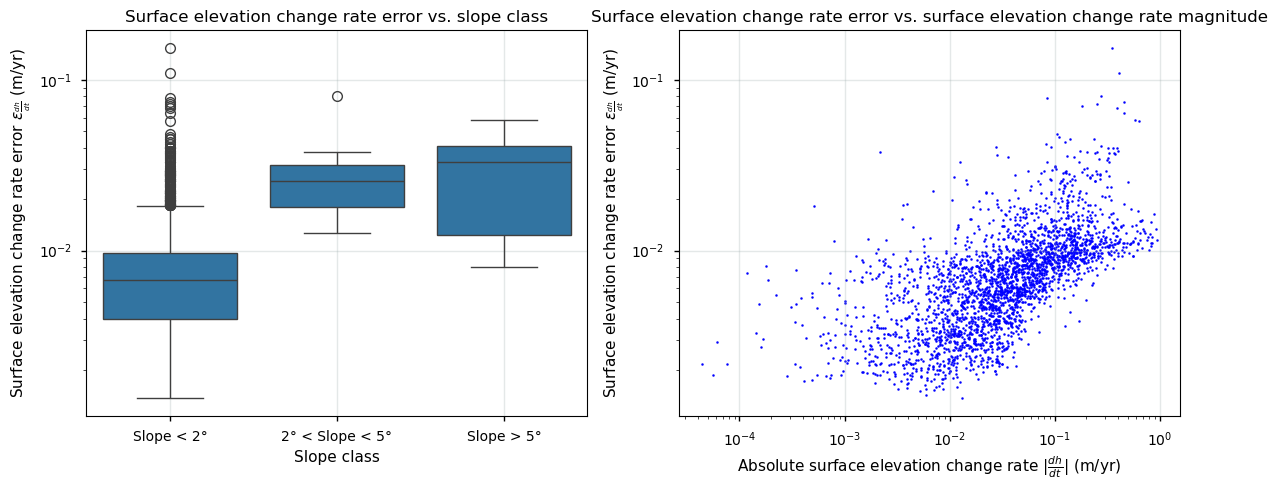

In [44]:
datasets = {
    'high_slope': datasets['high_slope'],  
    'sec_err': datasets['sec_err'],
    'sec': datasets['sec']
}

# Flatten the arrays and remove NaN values for the boxplot
df = pd.DataFrame({
    'slopemask_gris': np.ravel(datasets["high_slope"]),
    'mean_sec_err_gris': np.ravel(datasets["sec_err"])
}).dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(data=df, x='slopemask_gris', y='mean_sec_err_gris', ax=ax1)
ax1.set_ylabel(r'Surface elevation change rate error $\varepsilon_{\frac{dh}{dt}}$ (m/yr)')
ax1.set_xlabel('Slope class')
ax1.set_title("Surface elevation change rate error vs. slope class")
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(["Slope < 2°", "2° < Slope < 5°", "Slope > 5°"])
ax1.set_yscale('log')
ax1.grid(color='#95a5a6',linestyle='-',alpha=0.25)

# Scatter plot
sec_err = np.ravel(datasets["sec_err"])
sec = np.ravel(datasets["sec"])

# Remove NaN values for the scatter plot
mask = ~np.isnan(sec_err) & ~np.isnan(sec)
ax2.scatter(abs(sec[mask]), abs(sec_err[mask]), color='blue', s=2)
ax2.set_xlabel(r'Absolute surface elevation change rate $|\frac{dh}{dt}|$ (m/yr)')
ax2.set_ylabel(r'Surface elevation change rate error $\varepsilon_{\frac{dh}{dt}}$ (m/yr)')
ax2.set_title("Surface elevation change rate error vs. surface elevation change rate magnitude")
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.grid(color='#95a5a6',linestyle='-',alpha=0.25)

plt.tight_layout()
plt.show()

*Figure 6. Relationship between the surface elevation change error and (left) the slope of the terrain and (right) the magnitude of the ice sheet surface elevation change over Greenland from the SEC dataset on the Climate Data Store.*

The results are displayed in Figure 6. The highest errors are clearly present over complex and steep terrain around the marginal regions, which arise due to processing limitations or challenging data acquisition conditions. The first graph shows that regions with gentle slopes (<2°) have the lowest overall error, indicating better radar performance on flat surfaces. As slopes increase to more than 2 and 5°, the errors increase, reflecting the difficulty of capturing reliable measurements due to slope-induced errors. Moreover, the error also increases with the magnitude of the surface elevation changes themselves, as shown by the right plot. Areas with larger surface elevation changes, often found along ice sheet margins with complex terrain that are more prone to melting, tend to have higher error values. This occurs, amongst others, because radar reflections may occur from different snowpack layers (e.g. from liquid water within the snow or from refrozen ice lenses). This indicates that dynamic regions are harder to monitor consistently. In general, radar altimeters thus tend to perform better in the central, flat regions of Greenland due to simpler topography and relatively stable surfaces, while marginal zones with complex and dynamic terrain (where the most significant SEC occur) exhibit an increased uncertainty.

Let us at last quantify the amount of pixels that do not meet the GCOS precision error requirement of 0.1 m/yr. We therefore multiply the errors accompanying the data by 2 to get a precision error in the form of 2 standard deviations (as proposed by GCOS):

In [45]:
ds = datasets_original['greenland']
dhdt_uncert = ds['dhdt_uncert']
num_pixels_below_threshold = (2*dhdt_uncert < 0.1).sum().item()
total_pixels = dhdt_uncert.count().item()
percentage_below_threshold = (num_pixels_below_threshold / total_pixels) * 100

print(f"The absolute number of pixels with a surface elevation change rate precision error (2σ) < 0.1 m/yr is {num_pixels_below_threshold} pixels or {percentage_below_threshold:.2f}%.")

The absolute number of pixels with a surface elevation change rate precision error (2σ) < 0.1 m/yr is 1025570 pixels or 99.41%.


As already discussed above, almost all pixels exhibit error values that fall within international proposed thresholds, indicating a robust error characterization of the C3S SEC product for the GrIS.

(satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-4)=
### 4. Ice sheet surface elevation and altimetric volume change trends

(satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-4-1)=
#### 4.1 Spatial distribution of linear and quadratic trends

With the patterns of the surface elevation changes and their uncertainty known, let us proceed with the analysis. In this subsection, we explore the spatial distribution of surface elevation change rate trends across the Greenland Ice Sheet. Let us start by exploring the linear trends:

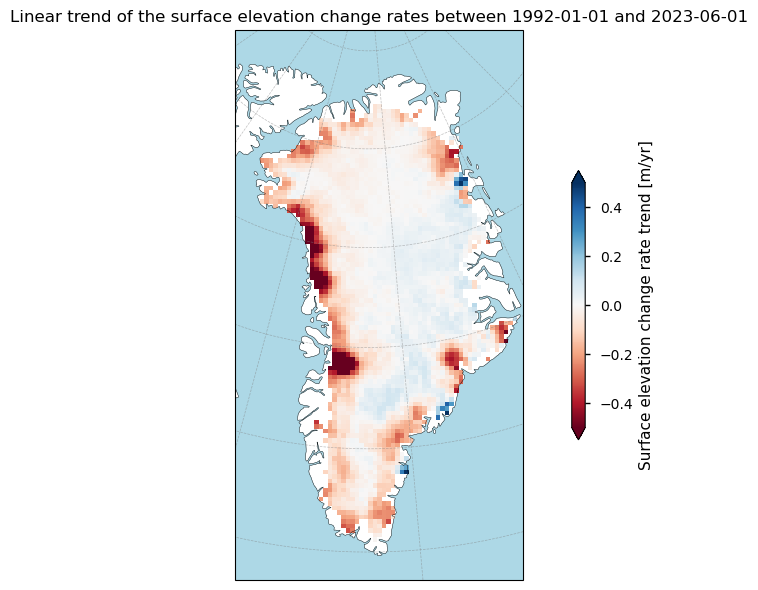

In [46]:
# Apply the function to the surface elevation change linear trends
da = xr.where(datasets_get_maps["sec"].isnull(), np.nan, datasets_get_maps["linear_trend"])  
da.attrs = {
    "long_name": r"Surface elevation change rate trend",
    "units": "m/yr",
}

# Plot the data
suptitle_text = rf"Linear trend of the surface elevation change rates between {begin_period.date()} and {end_period.date()}"
_ = plot_maps_single(
    da,
    vmin=-0.5,
    vmax=0.5,
    suptitle=suptitle_text,
)

*Figure 7. Linear trends of the ice sheet surface elevation change over Greenland from the SEC dataset on the Climate Data Store.*

The maps shows a similar pattern as the multiyear mean surface elevation change rates. The observed patterns highlight regional variability in surface elevation change trends, with coastal areas experiencing more substantial changes compared to interior regions. The data align with expected climate change impacts, where accelerating outlet glaciers and warming temperatures lead to increased melting and surface lowering, particularly in the low-elevation coastal areas [[1](https://doi.org/10.1016/j.epsl.2018.05.015), [3](https://doi.org/10.1016/j.rse.2016.12.012), [5](https://doi.org/10.1029/2020GL091216), [8](https://doi.org/10.5194/tc-5-173-2011), [10](https://doi.org/10.1038/s41586-019-1855-2)].

Let us now consider quadratic trends (accelerations):

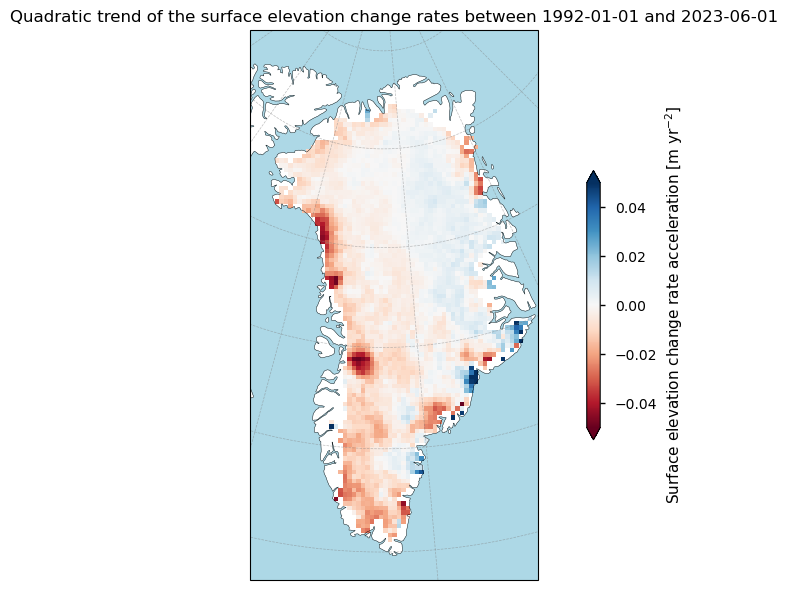

In [47]:
# Apply the function to the surface elevation change quadratic trends
da = xr.where(datasets_get_maps["sec"].isnull(), np.nan, datasets_get_maps["acceleration"])  
da.attrs = {
    "long_name": r"Surface elevation change rate acceleration",
    "units": "m yr$^{-2}$",
}

# Plot the data
suptitle_text = rf"Quadratic trend of the surface elevation change rates between {begin_period.date()} and {end_period.date()}"
_ = plot_maps_single(
    da,
    vmin=-0.05,
    vmax=0.05,
    suptitle=suptitle_text,
)

*Figure 8. Quadratic trends (acceleration) of the ice sheet surface elevation change over Greenland from the SEC dataset on the Climate Data Store.*

Again, the observed patterns highlight a clear regional variability in the acceleration and deceleration of surface elevation change rates. Coastal areas show more substantial changes in the acceleration of elevation change rates compared to central regions, which tend to be more stable. 

(satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-4-2)=
#### 4.2 Time series of surface elevation and volume change trends

Let us now quantify the ice sheet-wide surface elevation change and volume change trends as a time series:

The slope of the ice sheet cumulative average surface elevation change is -0.055 m/yr.
The trend is significant at an alpha level of 0.05, i.e. a monotonic linear trend is present.
The acceleration of the ice sheet cumulative average surface elevation change is -0.004 m/yr^2.
The slope of the ice sheet cumulative altimetric volume change is -94.701 km³/yr.
The trend is significant at an alpha level of 0.05, i.e. a monotonic linear trend is present.
The acceleration of the ice sheet cumulative altimetric volume change is -6.478 km³/yr^2.


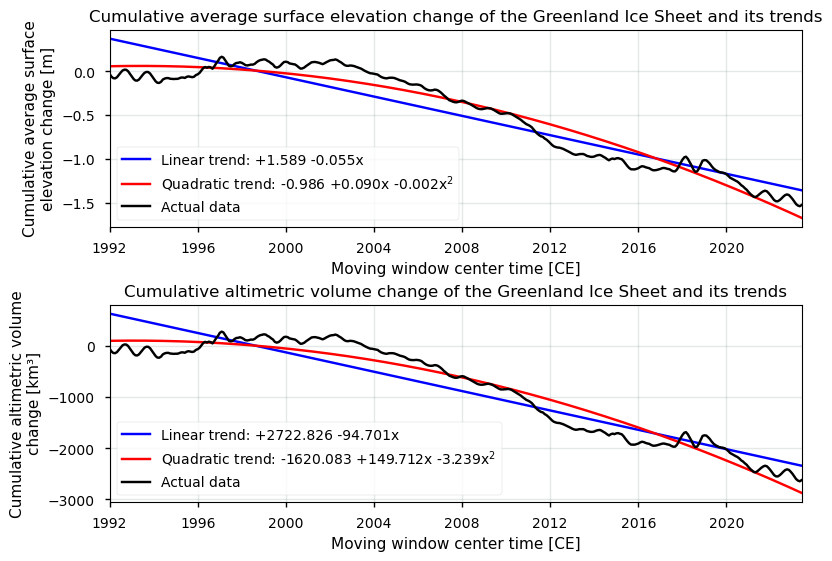

In [48]:
def plot_trends(datasets, varname):
    year_to_ns = 1.0e9 * 60 * 60 * 24 * 365

    fig, axs = plt.subplots(len(datasets), 1, layout="constrained", squeeze=False)
    for ax, (region, ds) in zip(axs.flatten(), datasets.items()):
        ds["time"].attrs["units"] = "CE"
        ds["time"].attrs["long_name"] = "Moving window center time"
        with xr.set_options(keep_attrs=True):
            da = ds[varname].cumsum("time") / 12
        da.attrs["units"] = da.attrs["units"].split("/", 1)[0]
        for label, degree, color in zip(
            (
                "Linear trend",
                "Quadratic trend",
            ),
            (1, 2),
            ('blue', 'red'),  # Specify colors for each trend
        ):
            # Compute coefficients
            coeffs = da.polyfit("time", degree)["polyfit_coefficients"]

            # Plot trends and print stats
            equation = []
            for deg, coeff in coeffs.groupby("degree"):
                coeff = coeff.squeeze() * (year_to_ns**deg)
                if deg == degree:
                    if deg == 1:
                        quantity = "slope"
                        units = f"{da.attrs['units']}/yr"
                    elif deg == 2:
                        quantity = "acceleration"
                        units = f"{da.attrs['units']}/yr^2"
                    else:
                        raise ValueError(f"{deg=}")
                    print(
                        f"The {quantity} of the ice sheet {da.attrs['long_name'].lower()} "
                        f"is {degree*coeff:.3f} {units}."
                    )
                    if deg == 1:
                        _, p_value = scipy.stats.kendalltau(da["time"], da)
                        s_lev = 0.05
                        is_significant = p_value < s_lev
                        print(
                            " ".join(
                                [
                                    "The trend",
                                    "is significant"
                                    if is_significant
                                    else "is not significant",
                                    f"at an alpha level of {s_lev}, i.e. a monotonic linear trend",
                                    "is present."
                                    if is_significant
                                    else "is not present.",
                                ]
                            )
                        )
                equation.append(
                    f"{float(coeff):+.3f}{'x' if deg else ''}{f'$^{deg}$' if deg>1 else ''}"
                )
            label = f"{label}: {' '.join(equation[::-1])}"
            fit = xr.polyval(da["time"], coeffs)
            fit.plot(label=label, ax=ax, color=color)
        da.plot(label="Actual data", ax=ax, color='black')
        ax.set_xlim(np.min(da["time"]),np.max(da["time"]))
        ax.set_title(f"{ds[varname].attrs['long_name']} of the Greenland Ice Sheet and its trends")
        ax.grid(color='#95a5a6',linestyle='-',alpha=0.25)
        ax.legend()

    return fig, axs

datasets_timeseries_trends = datasets_timeseries.drop_vars([var for var in datasets_timeseries.data_vars if var != 'sec'])
datasets_timeseries_trends["sec"].attrs = {
    "long_name": r"Cumulative average surface elevation change",
    "units": "m",
}
datasets_timeseries_trends = datasets_timeseries_trends.assign(dh_summed=datasets_timeseries["dvol"])
datasets_timeseries_trends["dh_summed"].attrs = {
    "long_name": r"Cumulative altimetric volume change",
    "units": "km³",
}
fig, axs = plot_trends(datasets_timeseries_trends, ~np.isnan(datasets_timeseries_trends["sec"]))

*Figure 9. Linear and quadratic trends of the cumulative (above) average ice sheet surface elevation change and (below) altimetric volume change over Greenland from the SEC dataset on the Climate Data Store.*

As seen earlier, the significant negative and downward trend, for both the linear and quadratic trend, implies that the surface is generally lowering over the GrIS, and that this lowering has been accelerating over the past several decades. As discussed before, the favorable error characterization and spatial/temporal coverage (with filled-up data gaps) of the C3S GrIS SEC product allow for a reliable and robust statistical analysis. The above-derived trends can thus be interpreted as being credible. Although surface elevation changes are not solely impacted by surface mass balance processes, the observed trends are moreover consistent with the expected impacts of climate change, where accelerating outlet glaciers and rising global temperatures result in increased melting, runoff and surface lowering [e.g. [1](https://doi.org/10.1016/j.epsl.2018.05.015), [4](https://doi.org/10.3189/172756505781829007), [8](https://doi.org/10.5194/tc-5-173-2011), [9](https://doi.org/10.1029/2021JF006505), [10](https://doi.org/10.1038/s41586-019-1855-2)]. Nevertheless, a notable bias exists when comparing the radar altimetry-derived SEC to those from laser altimetry, and the coarse spatial resolution of the C3S product may aid the corresponding underestimation of surface lowering rates as discussed before. 

(satellite_satellite-ice-sheet-elevation-change_trend-assessment_q01:section-5)=
### 5. Short summary and take-home messages

When measured over an extended period and over the complete ice sheet, trends in Greenland Ice Sheet surface elevation changes can serve as a clear indicator of global climate change. To ensure these trends are accurate, representative and reliable, the dataset should be sufficiently adequate in terms of its quality and maturity. Hence, the dataset should at least exhibit a comprehensive spatial coverage (i.e. ice sheet-wide), a long and continuous temporal coverage (> 30 years), quantified and transparent pixel-by-pixel uncertainty estimates that meet international proposed thresholds [[6](https://library.wmo.int/idurl/4/58111)], a validation effort, and an adequate spatio-temporal resolution (cfr. the "Maturity Matrix" [[7](https://doi.org/10.1175/BAMS-D-21-0109.1)]).

All in all, it can be said that the Greenland Ice Sheet (GrIS) surface elevation change dataset serves a robust indicator of global climate change, as several criteria for certain key quality aspects have been met. The temporal window of the data spams over 30 years at a consistent monthly resolution, which makes the surface elevation change dataset highly applicable for trend analysis. Furthermore, there is a complete spatio-temporal coverage since 1992 with filled-up data gaps. Error estimates (presented as 1-sigma precision errors) align with international proposed thresholds, confirming the dataset's high quality in terms of data uncertainty. Nevertheless, radar altimeters tend to perform better in the central, flat regions of the Greenland Ice Sheet, which have a simpler topography and a more stable surface, compared to the coastal areas with a more complex terrain (with steep slopes, valleys and ridges and large seasonal cycles of melt and accumulation) where errors are generally higher.

However, a notable bias exists when comparing radar altimetry-derived surface elevation changes to laser altimetry, particularly for significant lowering rates (below -0.5 to -1 m/yr), leading to underestimated surface elevation change and volume loss rates [[3](https://doi.org/10.1016/j.rse.2016.12.012)]. Apart from that, the coarse spatial resolution of 25 km is insufficient to capture the very localized mass loss of outlet glaciers, further complicating the data and underestimating surface elevation changes and volume losses to some degree [[5](https://doi.org/10.1029/2020GL091216)]. Users should furthermore note that surface elevation changes do not necessarily equal "actual" ice sheet volume nor mass changes, as processes such as bedrock elevation changes, firn densificaiton and density corrections for volume to mass changes have to be taken into account as well. The surface elevation change data can thus only be converted to "actual" ice sheet volume or mass changes if certain corrections and/or assumptions are made. Users of the C3S GrIS SEC data product are therefore most likely required to implement additional processing to derive glaciologically interpretable volume/mass changes from the provided surface elevation changes [e.g. [1](https://doi.org/10.1016/j.epsl.2018.05.015), [4](https://doi.org/10.3189/172756505781829007), [8](https://doi.org/10.5194/tc-5-173-2011), [9](https://doi.org/10.1029/2021JF006505), [10](https://doi.org/10.1038/s41586-019-1855-2)].

## ℹ️ If you want to know more

### Key resources

- ["Ice sheet surface elevation change rate for Greenland and Antarctica from 1992 to present derived from satellite observations"](https://cds.climate.copernicus.eu/datasets/satellite-ice-sheet-elevation-change?tab=overview) on the CDS
- [Documentation on the CDS](https://cds.climate.copernicus.eu/datasets/satellite-ice-sheet-elevation-change?tab=overview) and the [ECMWF Confluence Wiki](https://confluence.ecmwf.int/pages/viewpage.action?pageId=355345393) (Copernicus Knowledge Base).
- [Copernicus climate change indicators: ice sheets](https://climate.copernicus.eu/climate-indicators/ice-sheets)
- [An easy-to-read article about ice sheet altimetry](https://blogs.egu.eu/divisions/cr/2023/03/03/ice-radar-altimetry/)
- [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control` prepared by [B-Open](https://www.bopen.eu).

### References

- [[1](https://doi.org/10.1016/j.epsl.2018.05.015)] Sørensen, L. S., Simonsen, S. B., Forsberg, R., Khvorostovsky, K., Meister, R., and Engdahl, M. E. (2018). 25 years of elevation changes of the Greenland Ice Sheet from ERS, Envisat, and CryoSat-2 radar altimetry, Earth and Planetary Science Letters. 495. https://doi.org/10.1016/j.epsl.2018.05.015

- [[2](https://doi.org/10.5194/tc-13-427-2019)] Schröder, L., Horwath, M., Dietrich, R., Helm, V., van den Broeke, M.R., and Ligtenberg, S.R.M. (2019). Four decades of Antarctic surface elevation change from multi-mission satellite altimetry. The Cryosphere, 13, p. 427-449. https://doi.org/10.5194/tc-13-427-2019

- [[3](https://doi.org/10.1016/j.rse.2016.12.012)] Simonsen, S. B., and Sørensen, L. S. (2017). Implications of Changing Scattering Properties on Greenland Ice Sheet Volume Change from Cryosat-2 Altimetry. Remote Sensing of Environment. https://doi.org/10.1016/j.rse.2016.12.012

- [[4](https://doi.org/10.3189/172756505781829007)] Zwally, H. J., Giovinetto, M.B., Li, J., Cornejo, H.G, Beckley, M.A., Brenner, A.C., Saba, J.L., and Yi, D. (2005). Mass changes of the Greenland and Antarctic ice sheets and shelves and contributions to sea-level rise: 1992–2002. J. Glaciol. 51, 509–527, https://doi.org/10.3189/172756505781829007

- [[5](https://doi.org/10.1029/2020GL091216)] Simonsen, S. B., Barletta, V. R., Colgan, W. T., and Sørensen, L. S. (2021). Greenland Ice Sheet mass balance (1992–2020) from calibrated radar altimetry. Geophysical Research Letters, 48(3), e2020GL091216. https://doi.org/10.1029/2020GL091216

- [[6](https://library.wmo.int/idurl/4/58111)] GCOS (Global Climate Observing System) (2022). The 2022 GCOS ECVs Requirements (GCOS-245). World Meteorological Organization: Geneva, Switzerland. doi: https://library.wmo.int/idurl/4/58111

- [[7](https://doi.org/10.1175/BAMS-D-21-0109.1)] Yang, C. X., Cagnazzo, C., Artale, V., Nardelli, B. B., Buontempo, C., Busatto, J., Caporaso, L., Cesarini, C., Cionni, I., Coll, J., Crezee, B., Cristofanelli, P., de Toma, V., Essa, Y. H., Eyring, V., Fierli, F., Grant, L., Hassler, B., Hirschi, M., Huybrechts, P., Le Merle, E., Leonelli, F. E., Lin, X., Madonna, F., Mason, E., Massonnet, F., Marcos, M., Marullo, S., Muller, B., Obregon, A., Organelli, E., Palacz, A., Pascual, A., Pisano, A., Putero, D., Rana, A., Sanchez-Roman, A., Seneviratne, S. I., Serva, F., Storto, A., Thiery, W., Throne, P., Van Tricht, L., Verhaegen, Y., Volpe, G., and Santoleri, R. (2022). Independent Quality Assessment of Essential Climate Variables: Lessons Learned from the Copernicus Climate Change Service, B. Am. Meteorol. Soc., 103, E2032–E2049, doi: 10.1175/Bams-D-21-0109.1.

- [[8](https://doi.org/10.5194/tc-5-173-2011)] Sørensen, L. S., Simonsen, S. B., Nielsen, K., Lucas-Picher, P., Spada, G., Adalgeirsdottir, G., Forsberg, R., and Hvidberg, C. S. (2011). Mass balance of the Greenland ice sheet (2003–2008) from ICESat data – the impact of interpolation, sampling and firn density, The Cryosphere, 5, 173–186, https://doi.org/10.5194/tc-5-173-2011

- [[9](https://doi.org/10.1029/2021JF006505)] Khan, S. A., Bamber, J. L., Rignot, E., Helm, V., Aschwanden, A., Holland, D. M., van den Broeke, M., King, M., Noël, B., Truffer, M., Humbert, A., Solgaard, A. M., Box, J. E., Colgan, W. T., Wuite, J., Mouginot, J., Andersen, O. B., Csatho, B., Felikson, D., Fettweis, X., Forsberg, R., Gogineni, P., Joughin, I., Kjeldsen, K. K., Kuschnerus, M., Langen, P. L., Luckman, A., Luthcke, S. B., McMillan, M., Merryman Boncori, J. P., Morlighem, M., Mottram, R., Nagler, T., Nagy, T., Paden, J., Palmer, S., Poinar, K., Shepherd, A., Smith, B., Stearns, L. A., van Angelen, J. H., van der Wal, W., van de Berg, W. J., van Wessem, M., Velicogna, I., Wahr, J., Wendt, A., Wouters, B., & Zwally, H. J. (2022). Greenland mass trends from airborne and satellite altimetry during 2011–2020. Journal of Geophysical Research: Earth Surface, 127(3). https://doi.org/10.1029/2021JF006505

- [[10](https://doi.org/10.1038/s41586-019-1855-2)] The IMBIE Team (2019). Mass balance of the Greenland Ice Sheet from 1992 to 2018. Nature, 579, 233–239. https://doi.org/10.1038/s41586-019-1855-2

- [[11](https://doi.org/10.1038/s41586-018-0179-y)] The IMBIE Team (2018). Mass balance of the Antarctic Ice Sheet from 1992 to 2017. Nature 558, 219–222. https://doi.org/10.1038/s41586-018-0179-y